In [47]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import scipy.stats as stats


# visualization
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt




The recent increasing volatility in pricing and growing potential for profit in digital currency have made predicting the price of Bitcoin a very attractive research topic.

In [48]:
df_bitcoin = pd.read_csv("Bitcoin_data.csv", index_col = 0)
df_bitcoin['Date'] = pd.to_datetime(df_bitcoin['Date'])
df_bitcoin.set_index('Date', inplace=True)
df_bitcoin.sort_values('Date')

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2013-04-28,135.30,135.98,132.10,134.21,-,"1,488,566,728"
2013-04-28,135.30,135.98,132.10,134.21,-,"1,488,566,728"
2013-04-29,134.44,147.49,134.00,144.54,-,"1,603,768,865"
2013-04-29,134.44,147.49,134.00,144.54,-,"1,603,768,865"
2013-04-30,144.00,146.93,134.05,139.00,-,"1,542,813,125"
...,...,...,...,...,...,...
2019-07-13,11813.13,11841.96,10908.48,11392.38,"21,042,616,384","202,968,191,001"
2019-07-13,11813.13,11841.96,10908.48,11392.38,"21,042,616,384","202,968,191,001"
2019-07-14,11381.02,11451.20,10234.58,10256.06,"22,486,000,001","182,741,933,552"


The data set extracted from kaggle which consists of daily Bitcoin price between 28 April 2013 and 15 July 2019. 

In [49]:
df_bitcoin.count()

Open          4539
High          4539
Low           4539
Close         4539
Volume        4539
Market Cap    4539
dtype: int64

4539 daily Bitcoin prices have been used for this analysis. 

In [50]:
df_bitcoin.dtypes

Open          float64
High          float64
Low           float64
Close         float64
Volume         object
Market Cap     object
dtype: object

In [51]:
def custom_int_cast(string):
    if string == "-":
        return np.NAN
    else:
        return float(string.replace(",", ""))
df_bitcoin.Volume = df_bitcoin.Volume.apply(custom_int_cast)
df_bitcoin['Market Cap'] = df_bitcoin['Market Cap'].apply(custom_int_cast)

In [108]:
df_bitcoin["Close_Next_Day"] = df_bitcoin.Close.shift(-1).fillna(0)

In [109]:
df_bitcoin['15_Day_Rolling_Close'] = df_bitcoin.Close.rolling(window=15, min_periods=1).mean()
df_bitcoin['15_Day_Rolling_Close_STD'] = df_bitcoin.Close.rolling(window=15, min_periods=1).std()

In [110]:
df_bitcoin['Price_increase_next_day'] = (df_bitcoin.Close.shift(-1) - df_bitcoin.Close > 0).astype(int)

In [111]:
max(df_bitcoin.index)


Timestamp('2019-07-15 00:00:00')

In [112]:
min(df_bitcoin.index)

Timestamp('2013-04-28 00:00:00')

In [113]:
df_bitcoin.tail()


,Open,High,Low,Close,Volume,Market Cap,Close_Next_Day,15_Day_Rolling_Close,15_Day_Rolling_Close_STD,Price_increase_next_day
Date,,,,,,,,,,
2013-05-01,139.00,139.89,107.72,116.99,NaN,1.298955e+09,139.00,112.636000,5.170435,1
2013-04-30,144.00,146.93,134.05,139.00,NaN,1.542813e+09,144.54,114.288000,8.560217,1
2013-04-29,134.44,147.49,134.00,144.54,NaN,1.603769e+09,134.21,116.490667,11.527969,0
2013-04-28,135.30,135.98,132.10,134.21,NaN,1.488567e+09,134.21,117.572667,12.405968,0
2013-04-28,135.30,135.98,132.10,134.21,NaN,1.488567e+09,0.00,118.853333,13.093874,0


In [114]:
df_bitcoin.columns[df_bitcoin.isna().any()].tolist()

['Volume', '15_Day_Rolling_Close_STD']

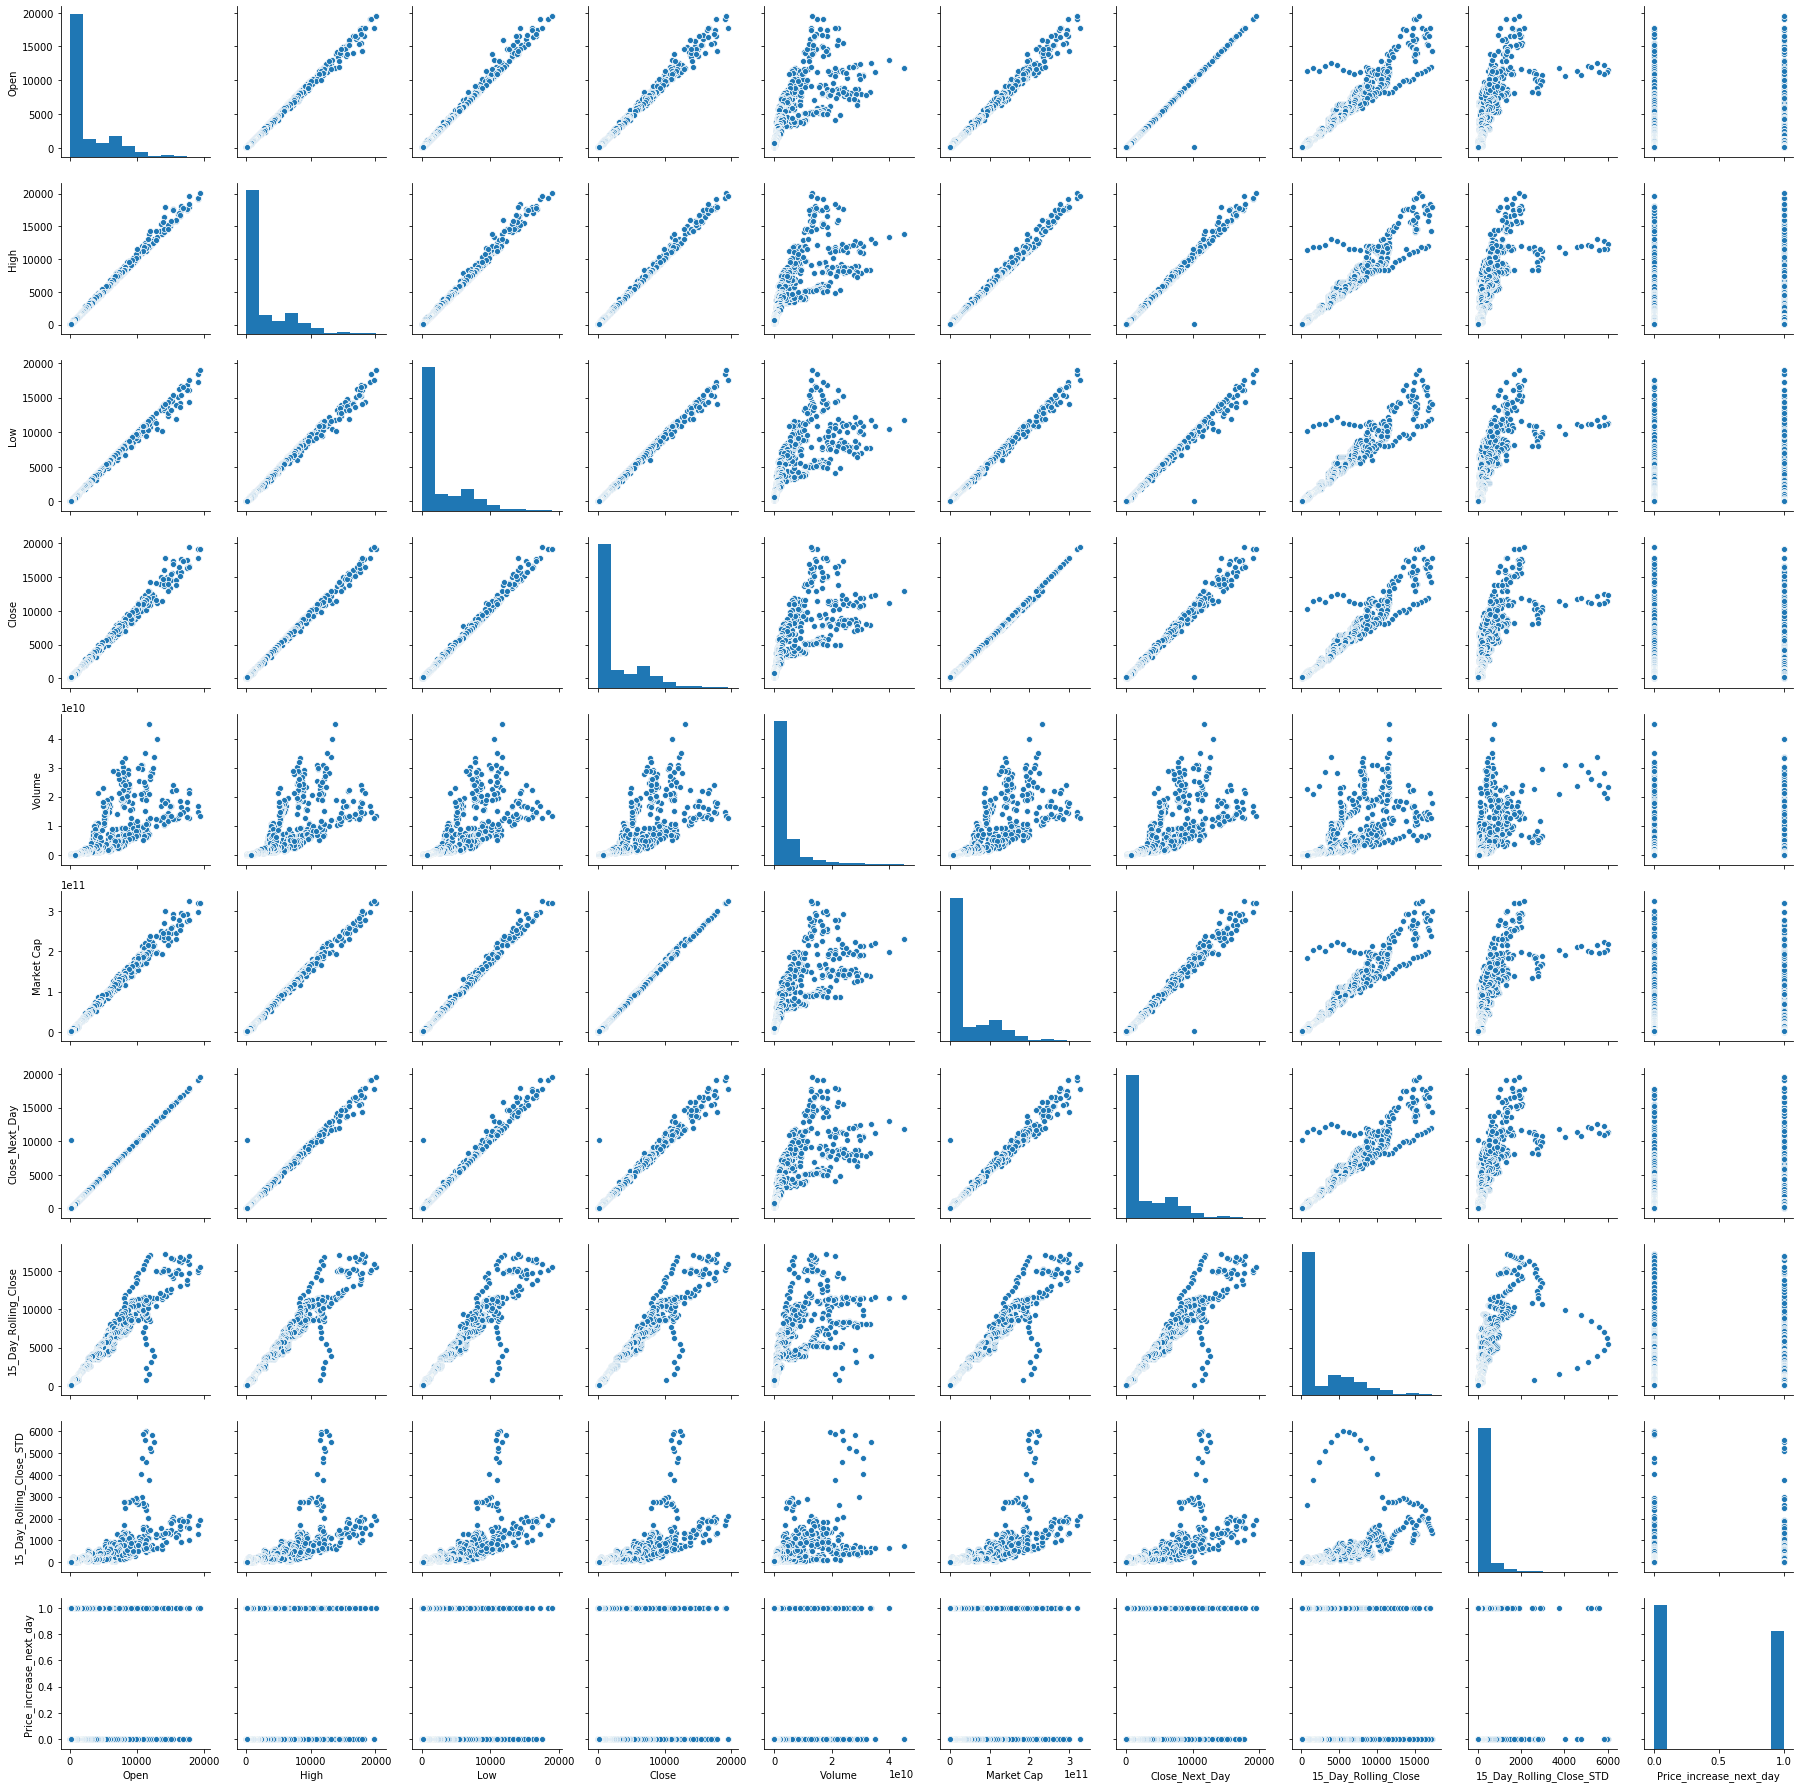

In [115]:
sns.pairplot(df_bitcoin)

In [116]:
auto_correlations = df_bitcoin.corr()
auto_correlations

,Open,High,Low,Close,Volume,Market Cap,Close_Next_Day,15_Day_Rolling_Close,15_Day_Rolling_Close_STD,Price_increase_next_day
Open,1.000000,0.998881,0.998097,0.997579,0.762570,0.997115,0.999081,0.980073,0.727118,0.009012
High,0.998881,1.000000,0.997885,0.999080,0.765906,0.998357,0.997965,0.982081,0.732587,-0.003350
Low,0.998097,0.997885,1.000000,0.998735,0.760261,0.998683,0.997170,0.981313,0.726350,-0.007729
Close,0.997579,0.999080,0.998735,1.000000,0.763830,0.999513,0.996666,0.983038,0.731750,-0.016185
Volume,0.762570,0.765906,0.760261,0.763830,1.000000,0.777419,0.762642,0.748092,0.583269,-0.021749
Market Cap,0.997115,0.998357,0.998683,0.999513,0.777419,1.000000,0.996208,0.982325,0.730183,-0.016490
Close_Next_Day,0.999081,0.997965,0.997170,0.996666,0.762642,0.996208,1.000000,0.979142,0.726421,0.009863
15_Day_Rolling_Close,0.980073,0.982081,0.981313,0.983038,0.748092,0.982325,0.979142,1.000000,0.709176,-0.023203
15_Day_Rolling_Close_STD,0.727118,0.732587,0.726350,0.731750,0.583269,0.730183,0.726421,0.709176,1.000000,-0.034840
Price_increase_next_day,0.009012,-0.003350,-0.007729,-0.016185,-0.021749,-0.016490,0.009863,-0.023203,-0.034840,1.000000


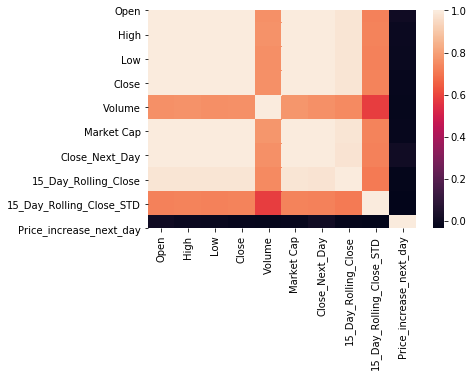

In [117]:
sns.heatmap(auto_correlations)

Text(0, 0.5, 'Price Per Standard Unit, USD')

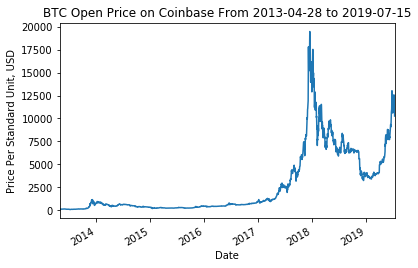

In [118]:
bitcoinOpenPrices = df_bitcoin.Open
bitcoinOpenPrices.plot(title="BTC Open Price on Coinbase From 2013-04-28 to 2019-07-15")
sns.mpl.pyplot.ylabel("Price Per Standard Unit, USD")


The Linear model used to predict Bitcoin prices fr next day. 

In [119]:
df_bitcoin_train = df_bitcoin.loc[:"2018-02-08",["Close"]]
df_bitcoin_test = df_bitcoin.loc["2018-02-09":,["Close"]]

Text(0, 0.5, 'Price Per Standard Unit, USD')

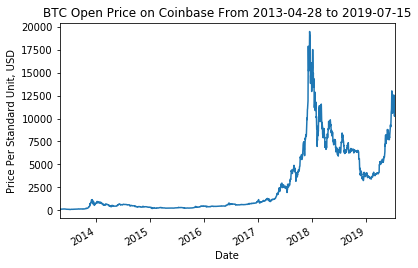

In [120]:
bitcoinPrices = df_bitcoin.Close
bitcoinPrices.plot(title="BTC Open Price on Coinbase From 2013-04-28 to 2019-07-15") #5
sns.mpl.pyplot.ylabel("Price Per Standard Unit, USD") #6


In [143]:
targets = df_bitcoin['Close'].shift(periods=-1).fillna(0).values
features = df_bitcoin[['Open','Close']].values
#x_train,x_test, y_train,y_test = train_test_split(features,targets,test_size=0.3,shuffle=False,random_state=42)

x_train = df_bitcoin.loc[:"2016-06-05",['Open','Close']]
x_test = df_bitcoin.loc[:"2016-06-05",["Close_Next_Day"]]
y_train = df_bitcoin.loc["2016-06-06":,['Open','Close']]
y_test = df_bitcoin.loc["2016-06-06":,["Close_Next_Day"]]


model = LinearRegression()
model.fit(x_train.iloc[1:2000],y_train.iloc[1:2000])
y_preds = model.predict(x_test)
print(y_test[0:10])
print(y_preds[0:10])
print("R2: %f" % metrics.r2_score(y_test,y_preds)) 
print("MSE: %f" % metrics.mean_squared_error(y_test,y_preds))
#print("EV: %f" % explained_variance_score(y_test,y_preds))
plt.scatter(y_preds,
            y_test)
plt.show()

ValueError: shapes (2270,1) and (2,2) not aligned: 1 (dim 1) != 2 (dim 0)

In [ ]:
coeffs = model.coef_
intercept = model.intercept_

print(intercept)
print(coeffs)

list(zip(features, model.coef_))



In [ ]:
#generate predictions on training set and evaluate
y_mult_pred_train = model.predict(x_train)
print("Training set RMSE:",np.sqrt(metrics.mean_squared_error(y_train, y_mult_pred_train)))

#generate predictions on test set and evaluate
y_mult_pred_test = model.predict(x_test)
print("Test set RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_mult_pred_test)))

In [70]:
df_bitcoin['target'] = df_bitcoin['Close'].shift(periods=-1)
targets = df_bitcoin.apply(lambda x: 1 if x['target']-x['Close'] > 0 else 0,axis=1).values
features = df_bitcoin[['Open','Close']].values
x_train,x_test, y_train,y_test = train_test_split(features,targets,test_size=0.3,shuffle=False,random_state=42)
logreg = LogisticRegression(solver='lbfgs',n_jobs=-1)
logreg.fit(x_train,y_train)
y_preds = logreg.predict(x_test)
print(y_test[0:10])
print(y_preds[0:10])
print("Acc: %f" % metrics.accuracy_score(y_test,y_preds))
print(metrics.confusion_matrix(y_test,y_preds))

[0 0 0 1 0 0 1 0 1 0]
[0 0 0 1 0 0 1 0 1 0]
Acc: 0.971366
[[713  17]
 [ 22 610]]


In [71]:
vals,counts = np.unique(y_test,return_counts=True)
print((vals,counts))
print("Baseline: %0.3f" % (counts[0]/(counts[0]+counts[1])))

(array([0, 1]), array([730, 632]))
Baseline: 0.536


We predict 0 on everything, we’ll get a baseline accuracy of 53.6%